In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install missingno
import missingno as msno
import math
from os import path

# plotly imports
! pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

! pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# folium imports
! pip install folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#importing models for preprocessing and splitting data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#importing packages for classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image

In [2]:
Listing_df = pd.read_csv("Airbnb_DataCleaning2.csv",encoding="latin-1")

In [3]:
Listing_df.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City,State,Zip
0,109,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,521,6/27/2008,NaN,NaN,NaN,f,...,4.00,f,1,1,0,0,0.02,Culver City,CA,90230
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",3008,9/16/2008,within a few hours,1.0,0.0100,t,...,4.85,t,3,0,3,0,0.69,Los Angeles,CA,90046
2,2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",3041,9/17/2008,within an hour,1.0,0.0037,t,...,4.40,f,2,1,1,0,0.35,Santa Monica,CA,90405
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,3207,9/25/2008,NaN,NaN,NaN,f,...,NaN,t,1,1,0,0,NaN,Bellflower,CA,90706
4,3021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,3415,10/2/2008,NaN,NaN,NaN,f,...,4.00,f,4,1,3,0,0.23,Los Angeles,CA,90046


In [4]:
Describe_df = Listing_df[["id","name","description","neighborhood_overview","host_is_superhost", "review_scores_value"]]
Describe_df.head()

,id,name,description,neighborhood_overview,host_is_superhost,review_scores_value
0,109,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,f,4.00
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",t,4.85
2,2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",t,4.40
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,f,NaN
4,3021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,f,4.00


### TEXT MINING for DESCRIPTION OF LISTING

### How SuperHost describe themselve

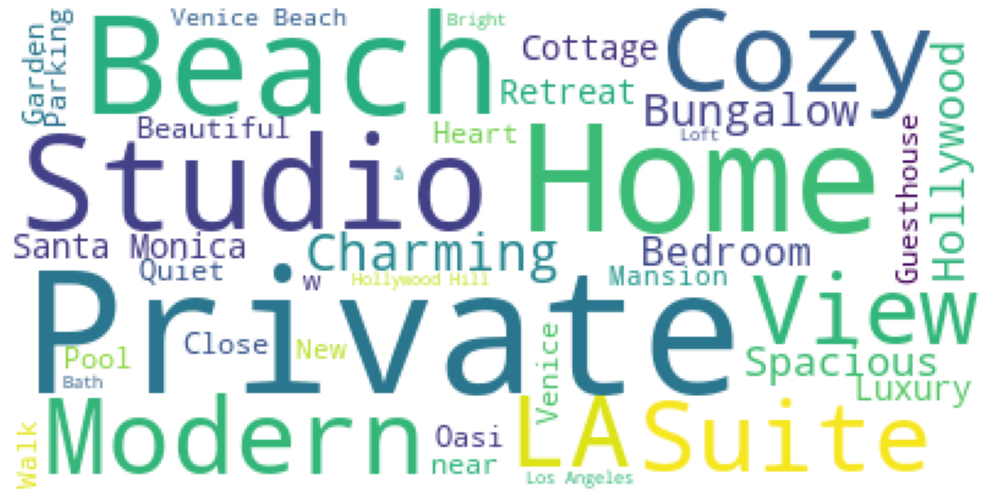

In [47]:
name_SuperHost = " ".join(str(w) for w in Describe_df.name[Describe_df.host_is_superhost == "t"])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70,background_color='white',stopwords=stopwords,max_words=40).generate(name_SuperHost)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name_SuperHost.png')
plt.show()

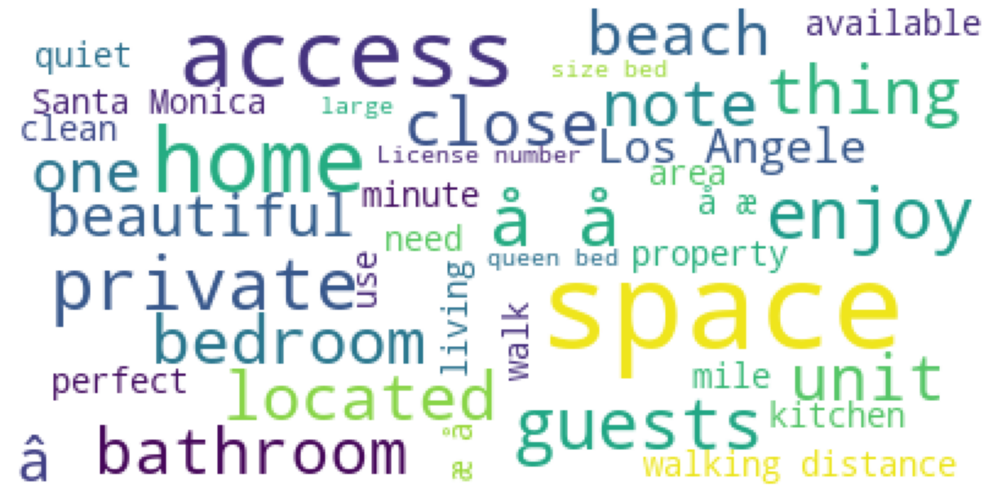

In [48]:
stopwords = set(STOPWORDS)
stopwords.add('room')
stopwords.add('hotel')
stopwords.add('place')
stopwords.add('will')
stopwords.add('stay')
stopwords.add('br')
stopwords.add('b')
stopwords.add('guest')
stopwords.add('house')
stopwords.add('apartment')
describe_SuperHost = " ".join(str(w) for w in Describe_df.description[Describe_df.host_is_superhost == "t"])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=50, background_color='white',stopwords=stopwords,max_words=40).generate(describe_SuperHost)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('describe_SuperHost.png')
plt.show()

### How Super Hosts having review score higher 4.95 describe themselve>

In [63]:
Sentiment_NonSuperHost

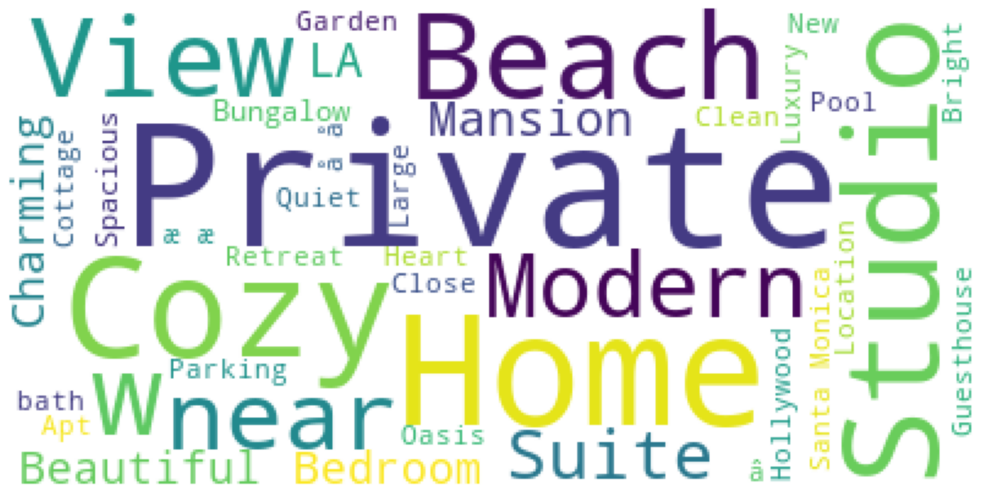

In [65]:
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70, background_color='white',stopwords=stopwords,max_words=40).generate(Describe_SuperH475)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('describe_SuperHost475.png')
plt.show()

### How frequently Non-SuperHost describe themselve

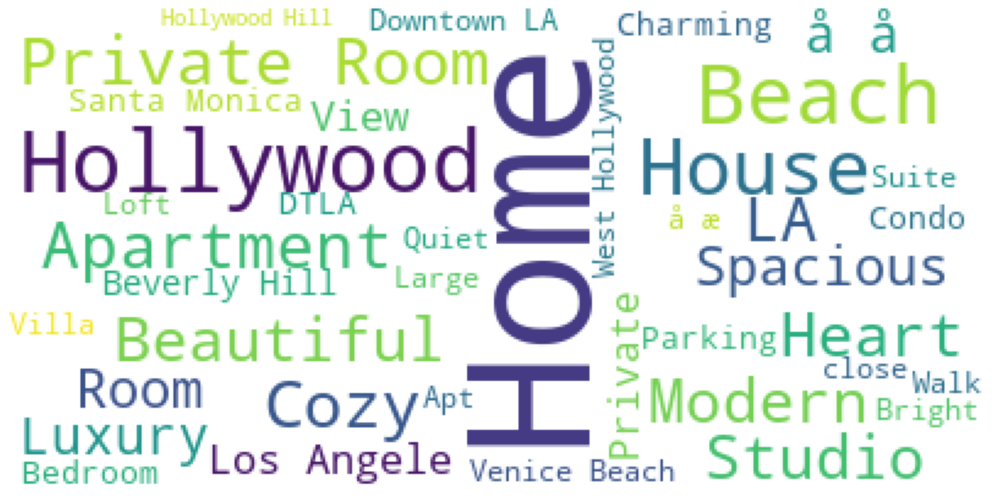

In [56]:
name_Non_SuperHost = " ".join(str(w) for w in Describe_df.name[Describe_df.host_is_superhost == "f"])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70,background_color='white',max_words=40).generate(name_Non_SuperHost)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name_Non_SuperHost.png')
plt.show()

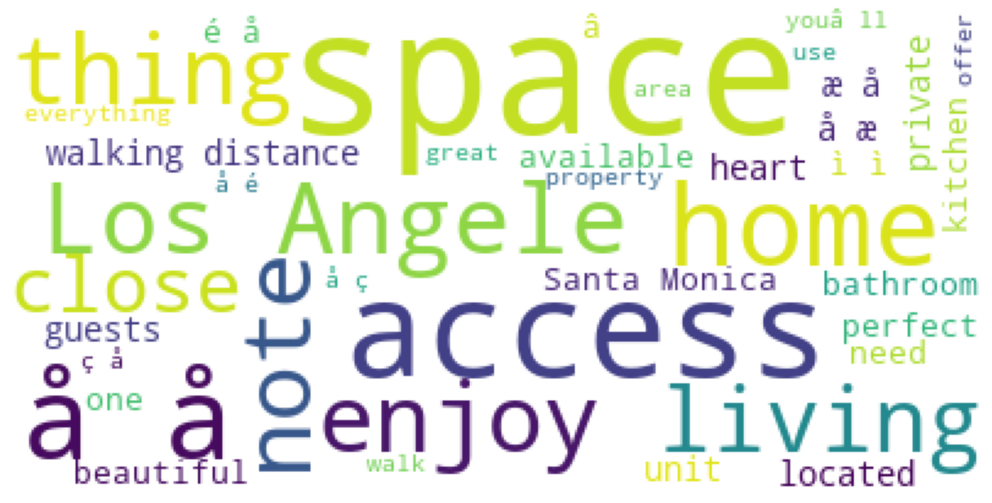

In [57]:
describe_Non_SuperHost = " ".join(str(w) for w in Describe_df.description[Describe_df.host_is_superhost == "f"])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70,background_color='white',stopwords=stopwords,max_words=40).generate(describe_Non_SuperHost)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('describe_Non_SuperHost.png')
plt.show()

### How Non-Super Hosts having less than 3.0 review score describe themselve

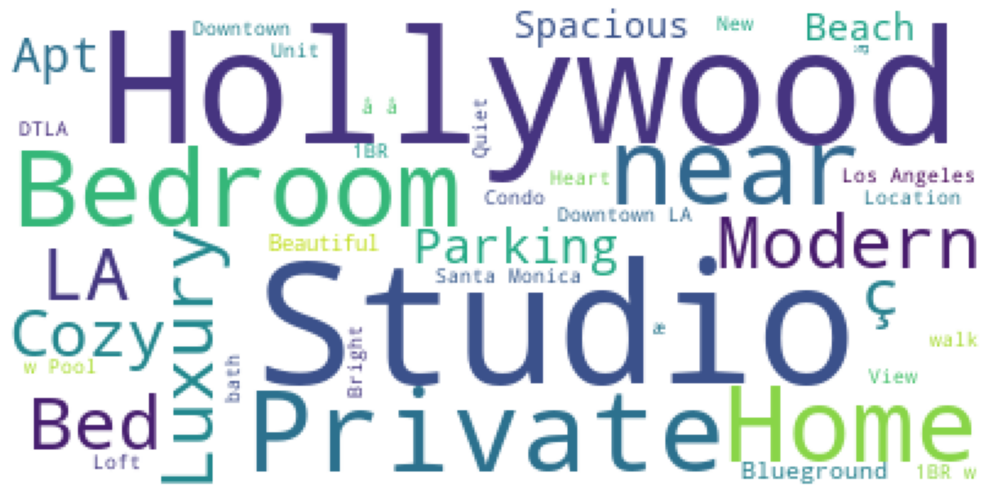

In [58]:
Describe_NONSuperH45 = " ".join(str(w) for w in Describe_df.name[(Describe_df.host_is_superhost == "f") & (Describe_df.review_scores_value <=3.0)])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70, background_color='white',stopwords=stopwords,max_words=40).generate(Describe_NONSuperH45)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('describe_NonSuperHost45.png')
plt.show()

## REVIEW of CUSTOMERS

In [2]:
Review_df = pd.read_csv("reviews.csv")
Review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...


In [3]:
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144105 entries, 0 to 1144104
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1144105 non-null  int64 
 1   id             1144105 non-null  int64 
 2   date           1144105 non-null  object
 3   reviewer_id    1144105 non-null  int64 
 4   reviewer_name  1144103 non-null  object
 5   comments       1142997 non-null  object
dtypes: int64(3), object(3)
memory usage: 52.4+ MB


In [38]:
Listing_id_df = Describe_df[["id","host_is_superhost","review_scores_value"]]
Listing_id_df = Listing_id_df.rename(columns={"id": "listing_id"})

In [39]:
Review_df = Review_df.merge(Listing_id_df, on='listing_id')
Review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,host_is_superhost,review_scores_value
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,f,4.00
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...,f,4.00
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...,t,4.85
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...,t,4.85
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...,t,4.85


### How Customers review SuperHost?

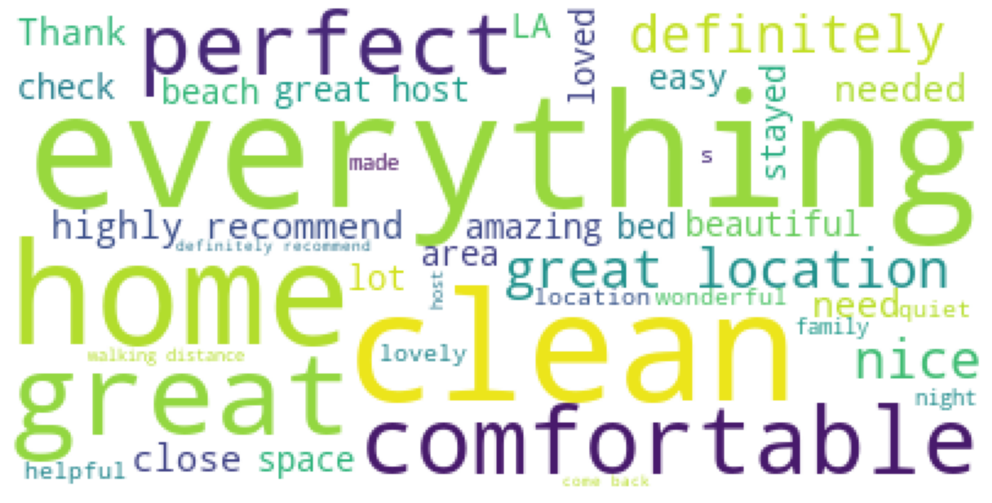

In [54]:
Review_SuperHost = " ".join(str(w) for w in Review_df.comments[Review_df.host_is_superhost == "t"])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70,background_color='white',stopwords=stopwords,max_words=40).generate(Review_SuperHost)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Review_SuperHost.png')
plt.show()

### Reviews for Top Super Host

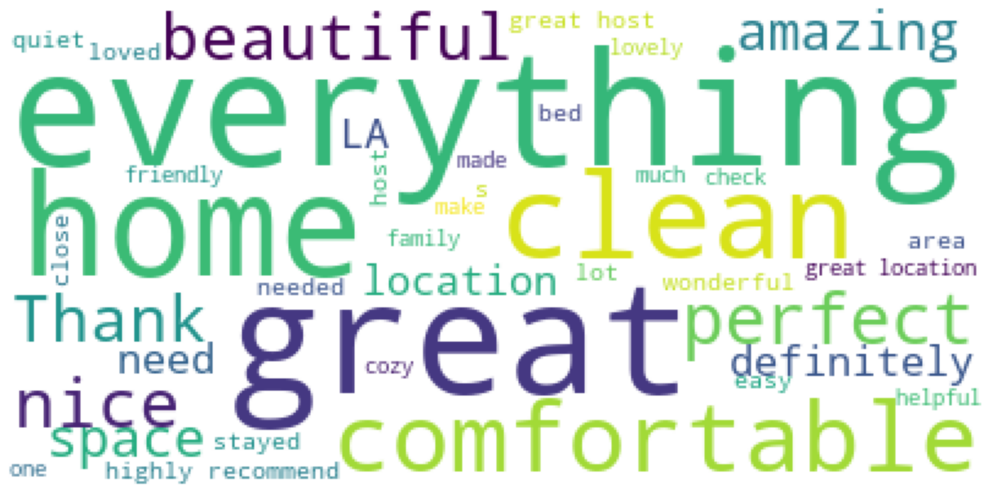

In [66]:
Revie_SuperH49 = " ".join(str(w) for w in Review_df.comments[(Review_df.host_is_superhost == "t") & (Review_df.review_scores_value >=4.95)])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70, background_color='white',stopwords=stopwords,max_words=40).generate(Revie_SuperH49)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Revie_SuperH49.png')
plt.show()

### How Customer Review Non-SuperHost

<Figure size 432x288 with 0 Axes>

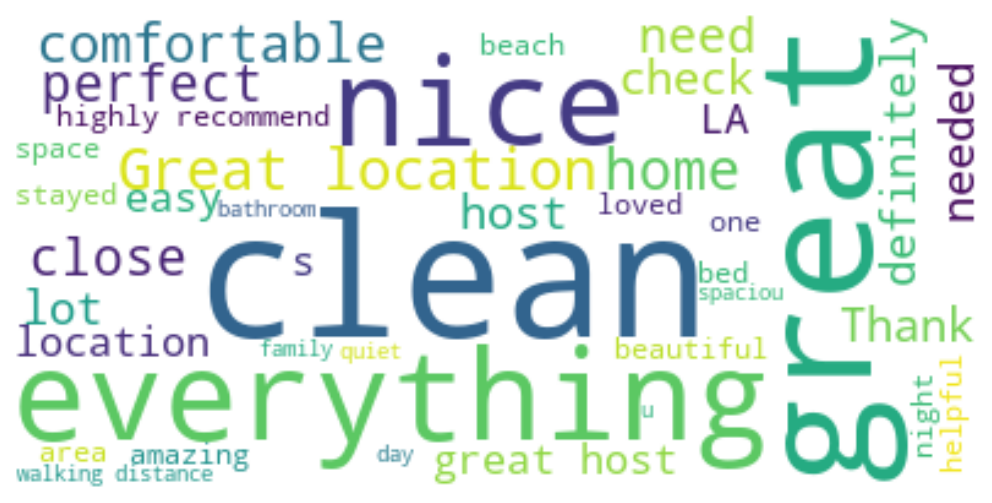

In [59]:
Review_Non_SuperHost = " ".join(str(w) for w in Review_df.comments[Review_df.host_is_superhost == "f"])
wordcloud = WordCloud(max_font_size=70,background_color='white',stopwords=stopwords,max_words=40).generate(Review_Non_SuperHost)
plt.figure()
plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Review_NonSuperHost.png')
plt.show();

### Reviews for Non-superHost (Review Score <3)

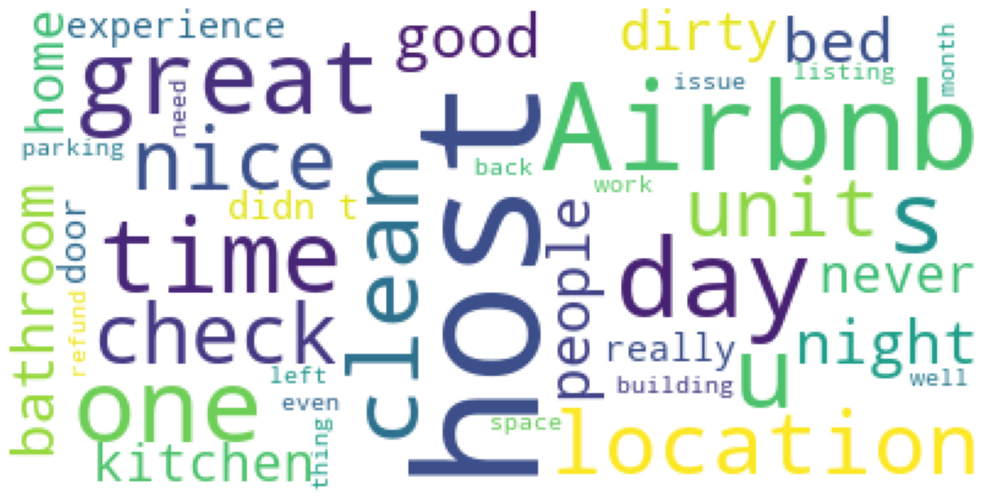

In [62]:
Revie_NONSuperH40 = " ".join(str(w) for w in Review_df.comments[(Review_df.host_is_superhost == "f") & (Review_df.review_scores_value <=3.0)])
plt.subplots(figsize=(18,9))
wordcloud = WordCloud(max_font_size=70, background_color='white',stopwords=stopwords,max_words=40).generate(Revie_NONSuperH40)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Revie_NONSuperH40.png')
plt.show()

In [68]:
Review_df.to_csv('ReviewsNew.csv', header=True, index=False)